In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [5]:
x = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [6]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42, test_size=.3)

In [10]:
xtest.size

1080

In [11]:
xtest.shape

(90, 12)

In [12]:
xtrain.shape

(209, 12)

# Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier()

In [15]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Score

In [16]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,  plot_roc_curve

In [17]:
prd = clf.predict(xtest)

In [18]:
prd

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [19]:
ytest.array

<PandasArray>
[0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0]
Length: 90, dtype: int64

In [20]:
print(classification_report(ytest, prd))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        53
           1       0.63      0.46      0.53        37

    accuracy                           0.67        90
   macro avg       0.66      0.64      0.64        90
weighted avg       0.66      0.67      0.65        90



In [21]:
confusion_matrix(ytest, prd)

array([[43, 10],
       [20, 17]], dtype=int64)

In [22]:
tp, fn, fp, tn = confusion_matrix(ytest, prd).reshape(-1)

# Accuracy

In [23]:
acc = (tp+tn) / (tp+tn+fp+fn)

In [24]:
acc

0.6666666666666666

In [25]:
accuracy_score(ytest, prd)

0.6666666666666666

# Precision

In [26]:
from sklearn.metrics import precision_score

In [27]:
prc = tp/(tp+fp)

In [28]:
prc

0.6825396825396826

In [29]:
precision_score(ytest, prd)

0.6296296296296297

# Recall

In [30]:
from sklearn.metrics import recall_score

In [31]:
rec = tp/(tp+fn)

In [32]:
rec

0.8113207547169812

In [33]:
recall_score(ytest, prd)

0.4594594594594595

# F1 Measure

In [34]:
from sklearn.metrics import f1_score

In [35]:
f1 = (prc+rec)/2

In [36]:
f1

0.7469302186283319

In [38]:
f1_score(ytest, prd)

0.53125

# Harmonic Mean

In [40]:
hm = (2*prc*rec)/(prc+rec)

In [41]:
hm

0.7413793103448275

# Specificity

In [47]:
spec = tn/(tn+fp)

In [48]:
spec

0.4594594594594595

# Critical Success Index

In [49]:
csi = tp/(tp+fp+fn)

In [50]:
csi

0.589041095890411

# False Discovery Rate

In [51]:
fdr = fp/(tp+fp)

In [52]:
fdr

0.31746031746031744

# ROC Curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


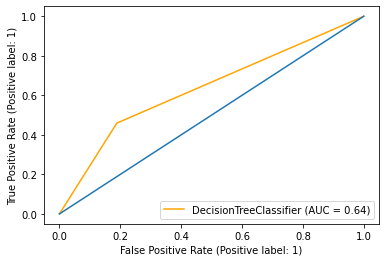

In [54]:
plot_roc_curve(clf, xtest , ytest, color='orange')
plt.plot([0,1],[0,1])